# Lab | Inferential statistics - T-test & P-value

### Instructions

1. *One-tailed t-test* - In a packing plant, a machine packs cartons with jars. It is supposed that a new machine will pack faster on average than the machine currently used. To test that hypothesis, the times each machine takes to pack ten cartons are recorded. The results are in seconds in the tables in the file `files_for_lab/machine.txt`.
   Assume that there is sufficient evidence to conduct the t-test, does the data provide sufficient evidence to show if one machine is better than the other?

In [1]:
import pandas as pd
import numpy as np 
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

In [153]:
machine_df = pd.read_csv('files_for_lab/machine.txt',sep='\t',encoding='UTF16')

In [154]:
machine_df

,New machine,Old machine
0,42.1,42.7
1,41.0,43.6
2,41.3,43.8
3,41.8,43.3
4,42.4,42.5
5,42.8,43.5
6,43.2,43.1
7,42.3,41.7
8,41.8,44.0
9,42.7,44.1


In [155]:
#list(machine_df.columns)#.str.lower().replace(" ","_")
columns = ['new_machine', 'old_machine']
machine_df.columns = columns
machine_df.columns

Index(['new_machine', 'old_machine'], dtype='object')

In [156]:
#creating a new column that shows the difference of seconds needed to pack
machine_df['difference'] = machine_df['old_machine'] - machine_df['new_machine']
#machine_df['difference'] = machine_df['new_machine'] - machine_df['old_machine']
machine_df

,new_machine,old_machine,difference
0,42.1,42.7,0.6
1,41.0,43.6,2.6
2,41.3,43.8,2.5
3,41.8,43.3,1.5
4,42.4,42.5,0.1
5,42.8,43.5,0.7
6,43.2,43.1,-0.1
7,42.3,41.7,-0.6
8,41.8,44.0,2.2
9,42.7,44.1,1.4


The t-test is a statistical method used to determine if there is a significant difference between the means of two groups. It's commonly employed when you have a small sample size and are dealing with normally distributed data, and the variance of the populations is not assumed to be equal.

We use a statistical test to see if the new machine is significantly faster than the old machine.

Null Hypothesis: 
The mean packing time for the new machine is slower than the mean packing time for the old machine.

𝐻0: μ new < μ old
   -> μ new < 43.23


Alternative Hypothesis:
The mean packing time for the new machine is faster or equal than the mean packing time for the old machine.

H1: μ new >= μ old
    -> μ new >= 43.23

In [175]:
old_machine_mean = machine_df['old_machine'].mean().round(2)
old_machine_mean

43.23

In [187]:
# The alternative='greater' parameter tests if the mean packing time for the new machine is greater than the mean packing time for the old machine.
t_statistic, p_value = st.ttest_1samp(machine_df['new_machine'], popmean=old_machine_mean, alternative="greater")
t_statistic, p_value

(-5.043318535038297, 0.9996516811961621)

In [186]:
# significance level (alpha)
alpha = 0.05

# Print the results
print("T_statistic is {:.2f} and the corresponding p-value is {:.2f}".format(t_statistic, p_value))

# Check for statistical significance
if p_value < alpha:
    print("P_value is smaller than the significance level of 0.05: Reject the null hypothesis. There is not sufficient evidence to suggest that the new machine is significantly faster than the old machine.")
else:
    print("P_value is bigger than the significance level of 0.05: Accept the null hypothesis. There is sufficient evidence to suggest that the new machine is significantly faster than the old machine.")

T_statistic is -5.04 and the corresponding p-value is 1.00
P_value is bigger than the significance level of 0.05: Don't reject the null hypothesis. There is sufficient evidence to suggest that the new machine is significantly faster than the old machine.


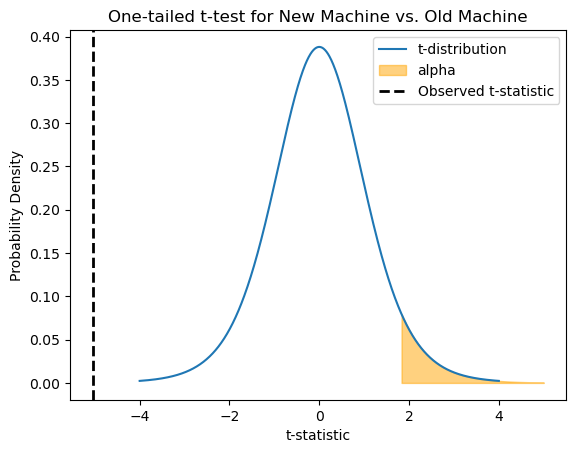

In [221]:
# Define degrees of freedom
df = len(machine_df['new_machine']) - 1

# Generate t-distribution values for the plot
x = np.linspace(-4, 4, 1000)
y = st.t.pdf(x, df)

# Plot the t-distribution
plt.plot(x, y, label='t-distribution')

# Plot the critical region (right tail)
x_critical = np.linspace(st.t.ppf(1 - alpha, df), 5, 100)
plt.fill_between(x_critical, st.t.pdf(x_critical, df), color='orange', alpha=0.5, label='alpha')

# Plot the observed t-statistic
plt.axvline(t_statistic, color='black', linestyle='dashed', linewidth=2, label='Observed t-statistic')

# Add labels and title
plt.xlabel('t-statistic')
plt.ylabel('Probability Density')
plt.title('One-tailed t-test for New Machine vs. Old Machine')
plt.legend()
plt.show()

The analysis suggests that, based on the sample data, I reject the null hypothesis. 

This means there is enough evidence to support the claim that on average the new machine is significantly faster than the old machine.









2. *Matched Pairs Test* - In this challenge we will compare dependent samples of data describing our Pokemon (file `files_for_lab/pokemon.csv`). Our goal is to see whether there is a significant difference between each Pokemon's defense and attack scores. Our hypothesis is that the defense and attack scores are equal. Compare the two columns to see if there is a statistically significant difference between them and comment on your result.

In [230]:
pokemon_df = pd.read_csv('files_for_lab/pokemon.csv')
pokemon_df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [249]:
pokemon_df.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,difference
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000,800.000000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375,5.158750
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129,33.732342
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000,-220.000000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000,-14.250000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000,5.000000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000,25.000000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000,160.000000


Our hypothesis is that the defense and attack scores are equal

$$H0: \mu_{b} = \mu_{a} → \mu_{b} - \mu_{a} = 0$$ 
$$H1: \mu_{b} \neq \mu_{a} → \mu_{b} - \mu_{a} \neq 0$$ 

In [255]:
sample = pokemon_df.sample(30, random_state = 1)
sample['difference'] = sample['Attack']-sample['Defense']
sample.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,difference
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False,26
510,460,Abomasnow,Grass,Ice,494,90,92,75,92,85,60,4,False,17
175,161,Sentret,Normal,NaN,215,35,46,34,35,45,20,2,False,12
735,667,Litleo,Fire,Normal,369,62,50,58,73,54,72,6,False,-8
242,224,Octillery,Water,NaN,480,75,105,75,105,75,45,2,False,30


In [256]:
sample = sample[['Attack','Defense','difference']]
sample.shape

(30, 3)

In [257]:
statistic, p_value = st.ttest_rel(sample['Attack'],sample['Defense'])
statistic, p_value 

(0.4222438544846934, 0.6759611742317202)

In [258]:
# Check for statistical significance
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is not sufficient evidence to suggest that the defense and attack scores are equal.")
else:
    print("Accept the null hypothesis. There is sufficient evidence to suggest that the defense and attack scores are equal.")

Accept the null hypothesis. There is sufficient evidence to suggest that the defense and attack scores are equal.


In [259]:
# the ttest would also work as:
statistic2, p_value2 = st.ttest_1samp(sample['difference'], 0, alternative="two-sided")
statistic2, p_value2

(0.4222438544846934, 0.6759611742317202)

# Inferential statistics - ANOVA

Note: The following lab is divided into 2 sections which represent activities 3 and 4.

## Part 1

In this activity, we will look at another example. Your task is to understand the problem and write down all the steps to set up ANOVA. After the next lesson, we will ask you to solve this problem using Python. Here are the steps that you would need to work on:
    - Null hypothesis
    - Alternate hypothesis
    - Level of significance
    - Test statistic
    - P-value
    - F table

### Context

Suppose you are working as an analyst in a microprocessor chip manufacturing plant. You have been given the task of analyzing a plasma etching process with respect to changing Power (in Watts) of the plasma beam. Data was collected and provided to you to conduct statistical analysis and check if changing the power of the plasma beam has any effect on the etching rate by the machine. You will conduct ANOVA and check if there is any difference in the mean etching rate for different levels of power. You can find the data `anova_lab_data.xlsx` file in the `files_for_lab` folder  

- State the null hypothesis
- State the alternate hypothesis
- What is the significance level
- What are the degrees of freedom of the model, error terms, and total DoF

Data were collected randomly and provided to you in the table as shown: [link to the image - Data](https://education-team-2020.s3-eu-west-1.amazonaws.com/data-analytics/7.05/7.05-lab_data.png)



In [260]:
df = pd.read_excel('files_for_lab/anova_lab_data.xlsx')

In [262]:
df.head()

,Power,Etching Rate
0,160 W,5.43
1,180 W,6.24
2,200 W,8.79
3,160 W,5.71
4,180 W,6.71


In [264]:
df.nunique()

Power            3
Etching Rate    15
dtype: int64

In [270]:
columns = ['power', 'etching_rate']
df.columns = columns

In [274]:
df['power'].unique()

array(['160 W', '180 W', '200 W'], dtype=object)

In [265]:
df.shape

(15, 2)

Our null hypothesis is that there is no significance difference in the mean etching rate for different levels of power.
The alternate hypothesis states that there is a significance difference.


$$H0: \mu_{1}=\mu_{2}=\mu_{3}$$
$$H1: \mu_{i}\neq\mu_{j}$$

for any i,j meaning at least one i  is different

In [277]:
# chosing a significance level
alpha = 0.05


# for k: there are three groups of power levels
k = len(df['power'].unique())
print(k)

# for N: total number of observations
N = len(df)
print(N)

# Degrees of Freedom
# These degrees of freedom values are crucial when consulting the F-distribution table or when 
# calculating critical values for the F-test. They determine the critical F-value that will be used to compare with the calculated F-value from the ANOVA test. 
# If the calculated F-value is greater than the critical F-value, you may reject the null hypothesis.
dof_model = k - 1
dof_error = N - k
dof_total = N - 1
print(dof_model)
print(dof_error)

3
15
2
12


## Part 2

- In this section, use Python to conduct ANOVA.
- What conclusions can you draw from the experiment and why?

In [285]:
# Group data by power levels
power_level_groups = [df[df['power'] == level]['etching_rate'].values for level in df['power'].unique()]
power_level_groups

[array([5.43, 5.71, 6.22, 6.01, 5.59]),
 array([6.24, 6.71, 5.98, 5.66, 6.6 ]),
 array([8.79, 9.2 , 7.9 , 8.15, 7.55])]

In [281]:
group_df = df.groupby('power')['etching_rate'].agg(rate_mean='mean', samples='size').reset_index()
group_df

,power,rate_mean,samples
0,160 W,5.792,5
1,180 W,6.238,5
2,200 W,8.318,5


In [292]:
groups = group_df['rate_mean']
groups

0    5.792
1    6.238
2    8.318
Name: rate_mean, dtype: float64

In [297]:
f_statistic, p_value = st.f_oneway(*power_level_groups)

In [298]:
# Output the results
print("F-Statistic:", f_statistic)
print("P-Value:", p_value)

F-Statistic: 36.87895470100505
P-Value: 7.506584272358903e-06


In [301]:
if p_value < alpha:
    print("Reject H0: There is a significance difference in the mean etching rate of at least one power level.")
else:
    print("Accept H0: There is not a significance difference in the mean etching rates for different levels of power")

Reject H0: There is a significance difference in the mean etching rate of at least one power level.


In conclusion, there is evidence to suggest that changing the power of the plasma beam has a significant effect on the etching rate by the machine.